In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from collections import Counter

from mlxtend.plotting import plot_decision_regions

In [2]:
# Load Data
raw_df = pd.read_csv('../../data/suicide.csv')
dupe_df = raw_df
raw_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 6. Visualizations

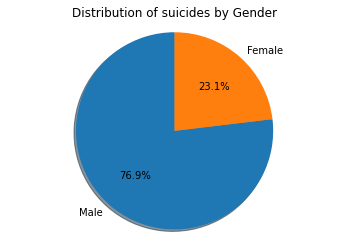

In [3]:
## Gender

labels = 'Male', 'Female'
values = [np.sum(raw_df[raw_df.sex.eq("male")].suicides_no), np.sum(raw_df[raw_df.sex.eq("female")].suicides_no)]
fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution of suicides by Gender')
plt.show()
plt.clf()
plt.cla()
plt.close()

In [4]:
# Renaming the columns
raw_df.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year', 'gdp_per_capita', 'generation']
raw_df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [5]:
raw_df.age_group.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [6]:
raw_df.generation.value_counts()

Generation X       6407
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Generation Xs         1
Name: generation, dtype: int64

In [7]:
# Counting Countries
#Listing countries

country = raw_df.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

### 1. Effectively summarize the data: what is it? what does it represent? How was it gathered?

- The data is a set of number of suicides per year in each country that reported to this data set.
- The data represents the number of suicides per year in each country by providing information on sex, age group, number of suicides in that country, population of country, suicides per 100k population, gdp for year, gdp per capita, and generation.
- The data was gathered from the World Health Organization (WHO) website.
- The data was gathered from the World Bank website.
- The data was also gathered from UN development program.

- `HDI for year` column has a lot of NaN values. No other columns in the dataset have missing values or NaN values. Therefore, we will be removing the `HDI for year` column
- There are 6 different age groups in the dataset
    - 15-24 years
    - 35-54 years    
    - 75+ years      
    - 25-34 years    
    - 55-74 years    
    - 5-14 years 
- Due to the fact that there are age groups instead of quantitative values for age and it is in a categorical format, we need to encode this data.
- Gender should also be encoded as it can be a boolean value ex. 1 = Male, 0 = Female
- There are 6 different generations in the dataset
    - Generation X       
    - Silent             
    - Millenials         
    - Boomers            
    - G.I. Generation    
    - Generation Z  
- Generation can be encoded as well as it is in a categorical format


### 2. What "classes" are present within the data?

I think some classes that are present in the data are:
- Population v. Suicides
- GDP v. Suicides
- Age v. Suicides

These 3 pairings are the classes that are present in the data to me.
The amount of people in a country can most certainly affect the number of suicides in that country.
If there are more people in a country, the number of suicides will be higher (naturally).
I also think that GDP of a country can be a factor on the number of suicides in the country.
If the GDP of the country is low, then the number of suicides may be higher and visa versa.
I also think that the age of a person can be a factor on the number of suicides in the country.
I would like to hypothesize and say that younger age groups will have a higher suicide rate than that of older age groups.

/var/folders/t4/ybx0qpc17lgbs28t98mp2wk40000gn/T/ipykernel_37728/3912671015.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = raw_df.groupby(["year","age_group"])["suicide_count", "population"].sum()
/opt/homebrew/Caskroom/miniforge/base/envs/env-01/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


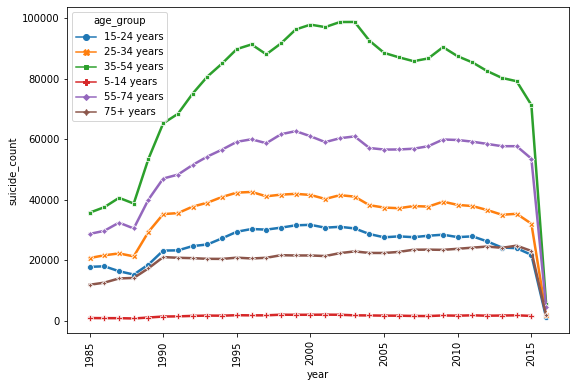

In [8]:
df_age = raw_df.groupby(["year","age_group"])["suicide_count", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicide_count, hue = "age_group",
             data = df_reset, linewidth = 2.5, style = "age_group", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

/var/folders/t4/ybx0qpc17lgbs28t98mp2wk40000gn/T/ipykernel_37728/3966085237.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = raw_df.groupby(["year","age_group"])["suicide_rate", "population"].sum()
/opt/homebrew/Caskroom/miniforge/base/envs/env-01/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


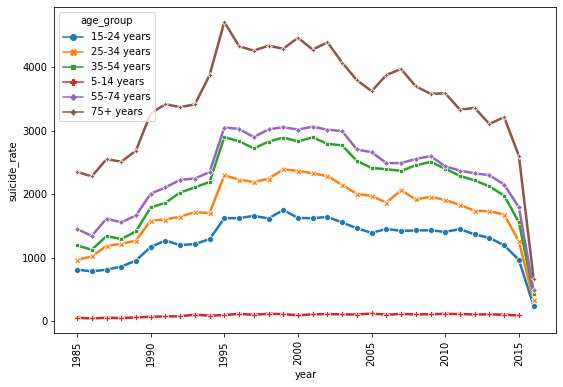

In [9]:
df_age = raw_df.groupby(["year","age_group"])["suicide_rate", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicide_rate, hue = "age_group",
             data = df_reset, linewidth = 2.5, style = "age_group", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

#### Class Hypothesis Result

Based off the lineplot above created from the raw (unmodified) dataset, we can see that the age group with the highest average number of sucides is the 35-54 years age group, followed by the 55-74 age group. Therefore, my hypothesis was incorrect, I believed that the age group 15-24 and 25-34 would have the highest average number of suicides, but that does not seem to be the case.

In [10]:
raw_df.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [11]:
# Checking for null or missing values

raw_df.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [12]:
# Dropping the HDI for year column
# The HDI has 19456 NaN values out of the 27820 total, which accounts for approximately 70% of the data in this column.
# This may affect the model's performance, therefore we will drop this column.

raw_df = raw_df.drop(['HDI for year'], axis = 1)
raw_df.shape

(27820, 11)

In [13]:
# Dropping the country-year for year column
# This is just a combination of 2 columns that already exist in the dataset

raw_df = raw_df.drop(['country-year'], axis = 1)
raw_df.shape

(27820, 10)

In [14]:
# Drop any NaN values if there are any, there should be very few if any

raw_df = raw_df.dropna()
raw_df.shape

(27820, 10)

In [15]:
raw_df['suicide_risk'] = 0

raw_df.loc[raw_df['suicide_rate'] > raw_df['suicide_rate'].mean(), 'suicide_risk'] = 1

raw_df['suicide_risk'].value_counts()


0    19061
1     8759
Name: suicide_risk, dtype: int64

In [16]:
raw_df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'suicide_risk'],
      dtype='object')

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation,suicide_risk
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2,0
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,6,0
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2,0
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1,0
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2,0
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,6,0
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,4,0
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,4,0


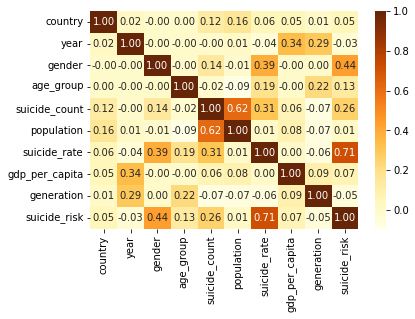

In [17]:
# Encode the categorical data as stated above
categorical_columns = ['country', 'year','age_group', 'gender', 'generation']
encoder = sklearn.preprocessing.LabelEncoder()

for column in categorical_columns:
    raw_df[column] = encoder.fit_transform(raw_df[column])
    prediction_decoded = encoder.inverse_transform(raw_df[column])



sns.heatmap(raw_df.corr(), annot=True, cmap='YlOrBr', fmt='.2f');
raw_df


In [18]:
# Copy of dataset for testing

test_df = raw_df.copy()
test_df

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation,suicide_risk
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2,0
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,6,0
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2,0
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1,0
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2,0
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,6,0
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,4,0
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,4,0


In [19]:
# Convert the column 'gdp_for_year' to float from object

raw_df['gdp_for_year'] = raw_df['gdp_for_year'].str.replace(',','').astype(float)
raw_df.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year      float64
gdp_per_capita      int64
generation          int64
suicide_risk        int64
dtype: object

In [20]:
# Scaling the numerical data columns 

numerical = ['suicide_count', 'population', 
              'gdp_for_year','gdp_per_capita']

scalar = RobustScaler()
raw_df[numerical] = scalar.fit_transform(raw_df[numerical])

raw_df['suicide_rate'] = raw_df['suicide_rate'] 
raw_df['suicide_rate'] = raw_df['suicide_rate'].astype('int')
raw_df

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation,suicide_risk
0,0,2,1,0,-0.031250,-0.084435,6,-0.182942,-0.400243,2,0
1,0,2,1,2,-0.070312,-0.087963,5,-0.182942,-0.400243,6,0
2,0,2,0,0,-0.085938,-0.101142,4,-0.182942,-0.400243,2,0
3,0,2,1,5,-0.187500,-0.294064,4,-0.182942,-0.400243,1,0
4,0,2,1,1,-0.125000,-0.112232,3,-0.182942,-0.400243,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,2,0.059520,-0.329631,2,0
27816,100,29,0,5,-0.125000,-0.058824,2,0.059520,-0.329631,6,0
27817,100,29,1,3,0.273438,1.679341,2,0.059520,-0.329631,4,0
27818,100,29,0,3,0.148438,1.585323,1,0.059520,-0.329631,4,0


### 3. What attributes look like they are paramters of an underlying population that could be learned by an unsupervised machine learning algorithm?

- The following attributes are parameters of an underlying population that could be learned by an unsupervised machine learning algorithm:

- GDP per Capita and Population of a country can effectively model the suicide rate of that country per year?
- GDP per year and Population of a country can effectively model the suicide rate of that country per year?
- Age Group and Gender can effectively model the suicide rate of that country per year?

These are the different features that stood out to me as being underlying parameters that could possibly be fed to an unsupervised machine learning algorithm to predict suicide rate within a country per year.


In [27]:
# Target Column X & Y Assignment

Y = raw_df['suicide_risk'] # Target
X = raw_df.drop('suicide_risk', axis=1) # Dataframe - Target

Y2 = raw_df['suicide_risk']
X2 = raw_df.drop('suicide_risk', axis=1)
X2 = raw_df.drop(['gender', 'age_group', 'suicide_count', 'gdp_for_year'], axis=1)

print(X2)
X.shape, Y.shape, X2.shape, Y2.shape


       country  year  population  suicide_rate  gdp_per_capita  generation  \
0            0     2   -0.084435             6       -0.400243           2   
1            0     2   -0.087963             5       -0.400243           6   
2            0     2   -0.101142             4       -0.400243           2   
3            0     2   -0.294064             4       -0.400243           1   
4            0     2   -0.112232             3       -0.400243           0   
...        ...   ...         ...           ...             ...         ...   
27815      100    29    2.297696             2       -0.329631           2   
27816      100    29   -0.058824             2       -0.329631           6   
27817      100    29    1.679341             2       -0.329631           4   
27818      100    29    1.585323             1       -0.329631           4   
27819      100    29    0.726453             1       -0.329631           0   

       suicide_risk  
0                 0  
1                 0

((27820, 10), (27820,), (27820, 7), (27820,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1)

# Scale the X data
scaler = StandardScaler()
scaler2 = StandardScaler()
X_train = scaler.fit_transform(X_train)
X2_train = scaler.fit_transform(X2_train)
X_test = scaler2.fit_transform(X_test)
X2_test = scaler2.fit_transform(X2_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((22256, 10), (5564, 10), (22256,), (5564,))

In [23]:
# Helper functions needed for KNN
def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

### 4. Implement your own version of one supervised or unsupervised machine learning algorithm in Python. See KNN implementation below

In [24]:
# My own KNN function

def knn_predict(X_train, X_test, y_train, k, p):

    y_hat_test = []

    for test_point in X_test:
        
        distances = []

        for train_point in X_train:

            distance = minkowski_distance(test_point, train_point, p=p)

            distances.append(distance)

        df_distances  = pd.DataFrame(data=distances, columns=['dist'], index=y_train.index)

        df_nn = df_distances.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]

        y_hat_test.append(prediction)

    return y_hat_test

y_hat_test = knn_predict(X2_train, X2_test, y2_train, k=5, p=1)

print(y_hat_test)


KeyboardInterrupt: 

In [ ]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

#  97% Accuracy rate for prediciting suicide risk

0.9726815240833933


### 5. Use the same machine learning algorithm in scikit-learn package to you dataset, compare the output with your own algorithm's output.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import joblib

pipe = Pipeline([('classifier' , KNeighborsClassifier())])
k_range = list(range(1, 31))
param_grid = [
    {'classifier' : [KNeighborsClassifier()],
     'classifier__n_neighbors' :k_range,
     'classifier__weights':['uniform','distance'],
'classifier__metric':['euclidean','manhattan'],
    }
]

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1,scoring='f1_macro')
clf2 = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1,scoring='f1_macro')

# Fit on data
best_clf = clf.fit(X_train, y_train)
best_clf2 = clf2.fit(X2_train, y2_train)
print("Best X_train paramters are:")
print(best_clf.best_params_)
print("Best f1 score for X_train (training) :",best_clf.best_score_)
print("Best f1 score for X_train (validation) :",f1_score(y_test, best_clf.predict(X_test), average='macro'))

print("Best X2_train paramters are:")
print(best_clf2.best_params_)
print("Best f1 score for X2_train (training) :",best_clf2.best_score_)
print("Best f1 score for X2_train (validation) :",f1_score(y2_test, best_clf2.predict(X2_test), average='macro'))

suicide_risk_dt = {
    'model': clf,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': ['country', 'gender', 'age_group', 'generation', 'suicide_count', 'gdp_for_year', 'gdp_per_capita'],
    'target_col': ['suicide_risk'],
    'numeric_cols': ['country',	'year',	'gender',	'age_group',	'suicide_count',	'population',	'suicide_rate',	'gdp_for_year',	'gdp_per_capita',	'generation' ],
    'categorical_cols': categorical_columns,
    'encoded_cols': categorical_columns,
}

joblib.dump(suicide_risk_dt, 'suicide_risk_dt.joblib')

Best X_train paramters are:
{'classifier': KNeighborsClassifier(metric='euclidean', n_neighbors=1), 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 6, 'classifier__weights': 'distance'}
Best f1 score for X_train (training) : 0.9666283284364544
Best f1 score for X_train (validation) : 0.9722469605152659
Best X2_train paramters are:
{'classifier': KNeighborsClassifier(metric='euclidean', n_neighbors=1), 'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}
Best f1 score for X2_train (training) : 1.0
Best f1 score for X2_train (validation) : 1.0


['suicide_risk_dt.joblib']

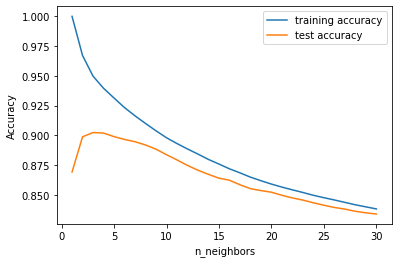

In [ ]:
# Comparing different n value accuracies with SKLearn Version
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

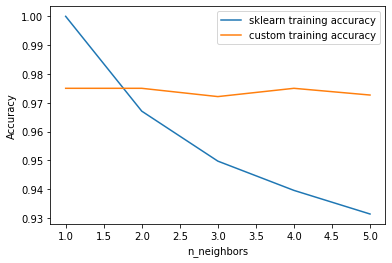

In [ ]:
# Comparing different n value accuracies with SKLearn Version
sk_learn_training_accuracy = []
sk_learn_test_accuracy = []
custom_training_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 6)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    sk_learn_training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    sk_learn_test_accuracy.append(knn.score(X_test, y_test))

    y_hat_test = knn_predict(X_train, X_test, y_train, k=n, p=1)
    custom_training_accuracy.append(accuracy_score(y_test, y_hat_test))
    



#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, sk_learn_training_accuracy, label="sklearn training accuracy")
plt.plot(neighbors_settings, custom_training_accuracy, label="custom training accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

### 7. Compare the behaviors of your machine learning algorithm and the one from scikit-learn package on the data

(a) See graph generated above.

(b) Generalization = 1 - accuracy
    For test - 
    For training - 1 - 0.9666283284364544 = 
    For validation: 1 - 0.9722469605152659 = 

(c) We already dropped HDI for year column.

    This is the results when we dropped gender column...

(d) 

Text(0.5, 1.0, 'Decision boundary using KNN Classification')

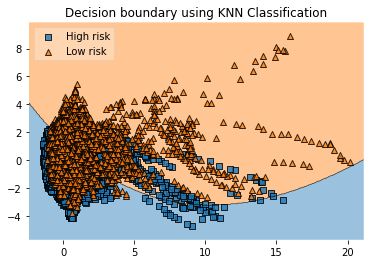

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
ax = plot_decision_regions(X_train2, y_train.to_numpy(), clf=clf, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['High risk', 'Low risk'], 
           framealpha=0.3, scatterpoints=1)
plt.title("Decision boundary using KNN Classification")